<div>
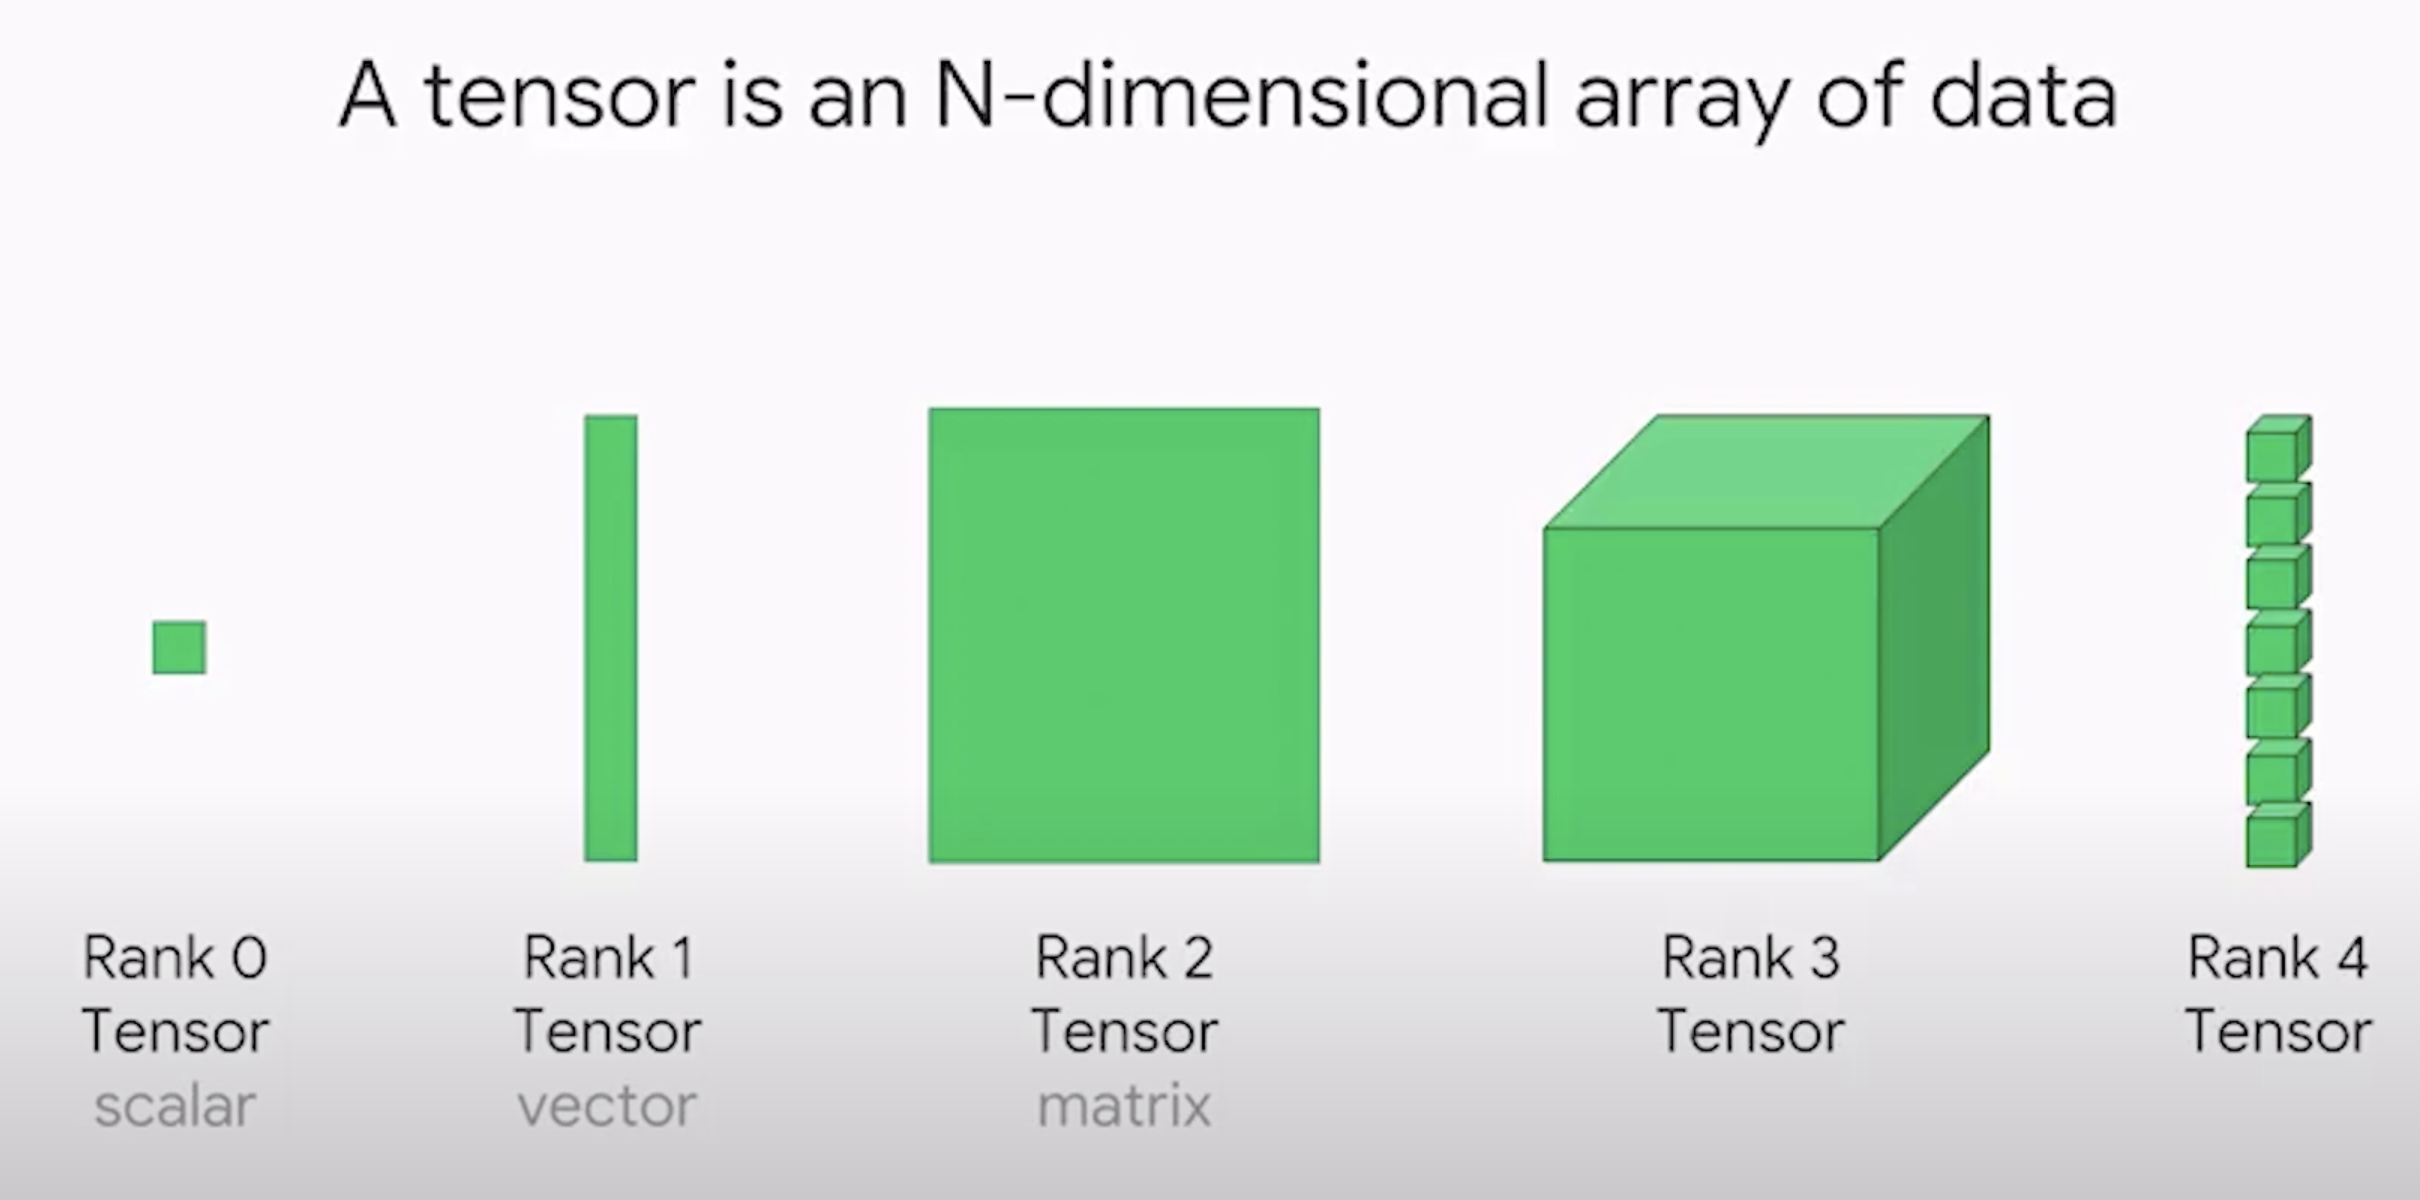
</div>

Keras is integrated with tensorflow and the official higher level api. It is essential for bulding neural networks and models in tensorflow. We're gonna take a look at the Sequential api and the functional api.  

<a id='1'></a>
<div class="alert alert-block alert-danger">
<h2>1 Import Packages</h2>
</div>

In [14]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # ignore information messages

import tensorflow as tf
from tensorflow.keras.datasets import mnist
# images of digits between 0 and 9 with 60000 train and 10000 test grayscale 28x28 pixels images
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:


# import cv2
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
# from tensorflow.keras.activations import relu
# from tensorflow.keras.models import load_model

# import tensorflow_datasets as tfds

<a id='2'></a>
<div class="alert alert-block alert-danger">
   <h2>
    2 Load Dataset
    </h2>
</div>

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- We're gonna send them to a neural network. So, we need to flatten them. We only have one long column with those feature values.  

In [16]:
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255.0

- -1 means keep whatever the value is on the dimension (60000)
- 28x28=784 flatten the dimensions
- X_train will be a numpy array float64. We can convert it to float32 to minimize some of the computation
- We will also normalize the value to between 0 and 1
- These are going to be numpy arrays

<a id='3'></a>
<div class="alert alert-block alert-danger">
   <h2>
    3 Create a basic neural network
    </h2>
</div>

<a id='31'></a>
<div class="alert alert-block alert-info">
   <h3>
        3.1 Sequential API
   </h3>
</div>

- Very convenient, not very flexible
- has one input and one output

<div class="alert alert-block alert-success">
        <strong>Alternative-1</strong>
</div>

In [21]:
model = Sequential([
    Input(shape=(28*28)),
    Dense(512, activation='relu'),   # Dense is for a fully connected layer with nodes
    Dense(256, activation='relu'),
    Dense(10)   # 10 -> (there are 10 digits from 0 to 9)
])

<div class="alert alert-block alert-success">
        <strong>Alternative-2</strong>
</div>

In [21]:
# model = Sequential()
# model.add(Input(shape=(28*28)))
# model.add(Dense(512, activation='relu'))
# model.summary()   # Debuging
# model.add(Dense(256, activation='relu'))
# model.add(Dense(10))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [18]:
# specify the training configuration (optimizer, loss, metrics)
model.compile(optimizer=Adam(lr=0.001),   # learning rate
             loss=SparseCategoricalCrossentropy(from_logits=True),
              # from_logits=True -> Dense(10, activation='softmax')
             metrics=['accuracy'])

In [20]:
%%time
# train the model by slicing the data into "batches" of size batch_size, and repeatedly iterating 
# over the entire dataset for a given number of epochs.
model.fit(X_train, y_train, batch_size=32, epochs=5)
model.evaluate(X_test, y_test, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0526 - accuracy: 0.9834
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0376 - accuracy: 0.9877
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0308 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0257 - accuracy: 0.9918
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9822
CPU times: user 31.1 s, sys: 27.7 s, total: 58.8 s
Wall time: 36.2 s


[0.07281740754842758, 0.982200026512146]

<a id='32'></a>
<div class="alert alert-block alert-info">
   <h3>
        3.2 Functional API
   </h3>
</div>

- a bit more flexible
- has multiple inputa and multiple outputs

In [33]:
inputs = Input(shape=(28*28))
x = Dense(512, activation='relu', name='first_layer')(inputs)
x = Dense(256, activation='relu', name='second_layer')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [31]:
# specify the training configuration (optimizer, loss, metrics)
model.compile(optimizer=Adam(lr=0.001),   # learning rate
             loss=SparseCategoricalCrossentropy(from_logits=False),
              # from_logits=False -> Dense(10, activation='softmax')
             metrics=['accuracy'])

In [32]:
%%time
# train the model by slicing the data into "batches" of size batch_size, and repeatedly iterating 
# over the entire dataset for a given number of epochs.
model.fit(X_train, y_train, batch_size=32, epochs=5)
model.evaluate(X_test, y_test, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1866 - accuracy: 0.9436
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0539 - accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9854
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9764
CPU times: user 32.4 s, sys: 28.4 s, total: 1min
Wall time: 36 s


[0.0884476825594902, 0.9764000177383423]